## ExMAS
> Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations
> 
> Kucharski R., Cats O. ,_Transportation Research Part: B_, 2020

---
#### Walkthrough

In [1]:
import os
cwd = os.getcwd()

In [5]:
os.chdir(os.path.join(cwd,'../..'))
import ExMAS.main
import ExMAS.utils

In [6]:
from ExMAS.utils import inData as inData

### prepare

1. __load the default config__ (see more details in `ExMAS/notebooks/01 configuration.ipynb`)

In [7]:
params = ExMAS.utils.get_config('ExMAS/data/configs/default.json') # load the default 
params = ExMAS.utils.make_paths(params)

2. __load the network__ (see more details in `ExMAS/notebooks/02 NetworkGraphs.ipynb`)

In [8]:
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

3. __generate trip requests__ (see more details in `ExMAS/notebooks/03 Demand Generation.ipynb`)

In [9]:
inData = ExMAS.utils.generate_demand(inData, params)

### run

18-03-22 08:52:22-INFO-Initializing pairwise trip shareability between 200 and 200 trips.
18-03-22 08:52:22-INFO-creating combinations
18-03-22 08:52:22-INFO-39800	 nR*(nR-1)
18-03-22 08:52:22-INFO-10223	departure compatibility
18-03-22 08:52:22-INFO-5152	origins shareability
18-03-22 08:52:22-INFO-1178	utility for i
18-03-22 08:52:22-INFO-364	utility for j
18-03-22 08:52:22-INFO-262	LIFO pairs
18-03-22 08:52:22-INFO-Reduction of feasible pairs by 99.34%


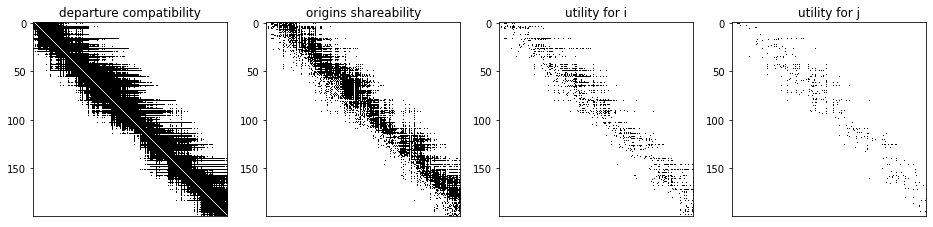

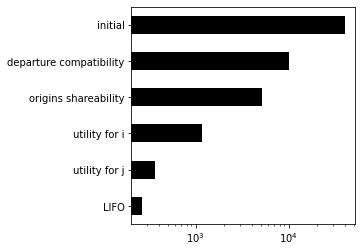

18-03-22 08:52:23-INFO-Degree 2 	Completed
18-03-22 08:52:23-INFO-trips to extend at degree 2 : 626
18-03-22 08:52:23-INFO-At degree 2 feasible extensions found out of 134 searched
18-03-22 08:52:23-INFO-Degree 3 	Completed
18-03-22 08:52:23-INFO-trips to extend at degree 3 : 134
18-03-22 08:52:23-INFO-At degree 3 feasible extensions found out of 12 searched
18-03-22 08:52:23-INFO-Degree 4 	Completed
18-03-22 08:52:23-INFO-trips to extend at degree 4 : 12
18-03-22 08:52:23-INFO-At degree 4 feasible extensions found out of 0 searched
18-03-22 08:52:23-INFO-Degree 5 	Completed
18-03-22 08:52:23-INFO-No more trips to exted at degree 5
18-03-22 08:52:23-INFO-Matching 200 trips to 972 rides in order to min u_veh


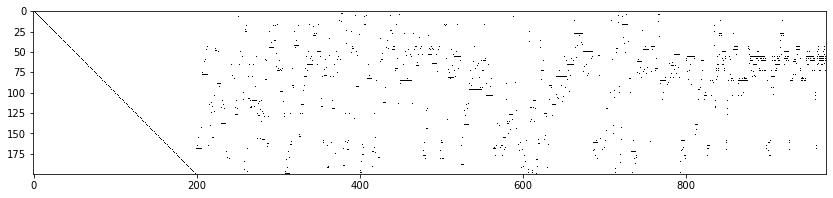

18-03-22 08:52:25-INFO-Problem solution: Optimal. 
Total costs for single trips:         65,331 
reduced by matching to:               50,767
18-03-22 08:52:25-INFO-Calculations  completed
18-03-22 08:52:25-INFO-DotMap(VehHourTrav=50197, VehHourTrav_ns=65331, PassHourTrav=73157, PassHourTrav_ns=65331, PassUtility=973.483475, PassUtility_ns=1013.6715, mean_lambda=0.31093082835183605, revenue_s=68597.55, revenue_ns=97996.5, Fare_Discount=-0.3, nR=200, SINGLE=86, PAIRS=38, TRIPLES=10, QUADRIPLES=2, QUINTETS=0, PLUS5=0, shared_ratio=0.5700000000000001, fleet_size_nonshared=26.0, fleet_size_shared=17.0, lambda_shared=0.31093082835183605)


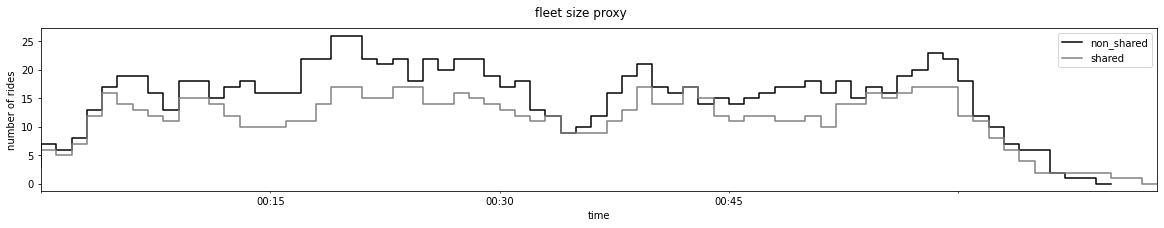

In [10]:
inData = ExMAS.main(inData, params, plot = True)

### results:
> illustrative example of 100 rides

KPIs

In [8]:
KPIs = inData.sblts.res.to_frame()
KPIs['description']  = ExMAS.utils.KPIs_descriptions
KPIs.columns = ['KPI', 'description']
KPIs

,KPI,description
VehHourTrav,50543,total travel time of vehicles (with travellers...
VehHourTrav_ns,64590,as above yet in non-shared scenarion
PassHourTrav,71619,total travel time of passengers
PassHourTrav_ns,64590,as above yet in non-shared scenarion
PassUtility,948.603,total (dis)utility of passengers
PassUtility_ns,1002.16,as above yet in non-shared scenarion
mean_lambda,0.275169,mean vehicle cost reduction (lambda) over shar...
revenue_s,67819.5,total fares paid by travellers sharing
revenue_ns,96885,as above yet in non-shared scenarion
Fare_Discount,-0.3,relative revenue reduction


 all feasible rides

In [18]:
inData.sblts.rides.sample(3)

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,row,selected
220,"[178, 195]",12.32350,572,20,"[5.255424999999999, 7.068075]","[3330.5, 19, 362, 176]","[178, 195]","[178, 195]",2.0,220,0.331776,856,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
266,"[14, 33]",11.71695,576,20,"[6.160699999999999, 5.5562499999999995]","[416.0, 126, 392, 43]","[14, 33]","[14, 33]",2.0,266,0.254851,773,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
586,"[54, 91]",13.96500,1088,20,"[9.049075, 4.915925]","[975.5, 709, 127, 237]","[54, 91]","[54, 91]",2.0,586,-0.118191,973,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


ride 

In [17]:
ride =inData.sblts.rides.sample(1).T
ride['d'] = ExMAS.utils.rides_DESCRIPTIONS
ride.columns = ['ride', 'description']
ride

,ride,description
indexes,"[90, 109]",travellers indexes
u_pax,7.83405,total (dis)utility of travellers (eq. 4 from t...
u_veh,635,total (dis)utility of vehicle (ride time) [s]
kind,20,"type of a trip (1 - single rides, 2* rides of ..."
u_paxes,"[4.8340250000000005, 3.000025]",(dis) utilities of consecutive travellers
times,"[1619.5, 355, 71, 194]",sequence of times [first pickup (seconds of si...
indexes_orig,"[90, 109]",indexes of consequently picked up travellers
indexes_dest,"[90, 109]",indexes of consequenctly droped off travellers
degree,2,degree (number of travellers)
index,531,id


selected rides in the solution

In [10]:
inData.sblts.schedule.sample(5)

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,row,selected
132,[132],4.0825,263,1,[4.0825],"[2444, 263]",[132],[132],1,132,0.300000,263,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
42,[42],0.8990,58,1,[0.899],"[794, 58]",[42],[42],1,42,0.300000,58,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
732,"[11, 9]",16.3093,772,21,"[9.703399999999998, 6.6059]","[216.0, 85, 496, 176]","[11, 9]","[9, 11]",2,732,0.362510,1211,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
45,[45],4.9085,316,1,[4.9085],"[888, 316]",[45],[45],1,45,0.300000,316,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
552,"[61, 75]",11.4023,683,20,"[5.9094, 5.4929]","[1172.0, 193, 272, 203]","[61, 75]","[61, 75]",2,552,0.153656,807,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


trips with parameters of the shared ride

In [11]:
inData.sblts.requests

,index,origin,destination,treq,tdep,ttrav,tarr,tdrop,dist,pax_id,VoT,delta,u,u_PT,ride_id,ttrav_sh,u_sh,kind,position
67,4,44782008,4261101419,1260,NaN,276,2020-11-02 15:29:12,NaN,2210,4,0.0035,154.879121,4.281,999999,67,276,4.281000,1,0
70,178,1774593301,1530303610,1304,NaN,582,2020-11-02 16:10:46,NaN,4660,178,0.0035,326.571429,9.027,999999,740,599,8.027950,21,0
111,72,509292974,44855139,1978,NaN,107,2020-11-02 15:18:39,NaN,859,72,0.0035,60.263736,1.663,999999,111,107,1.663000,1,0
156,34,443898116,1393024904,2864,NaN,580,2020-11-02 16:36:30,NaN,4644,34,0.0035,325.450549,8.996,999999,529,637,8.027075,20,0
68,182,60247463,1435362340,1292,NaN,553,2020-11-02 16:06:41,NaN,4427,182,0.0035,310.219780,8.576,999999,719,553,7.619500,21,1


In [19]:
trip =inData.sblts.requests.sample(1).T
trip['d'] = ExMAS.utils.trips_DESCRIPTIONS
trip.columns = ['ride', 'description']
trip

,ride,description
index,29,id
origin,44821573,origin node (OSM index)
destination,44847020,destination node (OSM index)
treq,2787,desired departure time
tdep,NaN,"[deprecated, from MaaSSim]"
ttrav,223,travel time [s] (shortest)
tarr,2020-11-02 15:47:34,desired arrival time (pd.datetime)
tdrop,NaN,"[deprecated, from MaaSSim]"
dist,1785,distance in meters (shortest)
pax_id,29,id


---
(c) Rafał Kucharski, Delft, 2020